In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\(CSE)project_dataset/Diabetes_data/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,140,94,0,0,32.7,0.734,45,1
1,4,153,88,37,140,40.6,1.174,39,0
2,3,100,84,33,105,30.0,0.488,46,0
3,1,147,94,41,0,49.3,0.358,27,1
4,1,81,74,41,57,46.3,1.096,32,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1173 non-null   int64  
 1   Glucose                   1173 non-null   int64  
 2   BloodPressure             1173 non-null   int64  
 3   SkinThickness             1173 non-null   int64  
 4   Insulin                   1173 non-null   int64  
 5   BMI                       1173 non-null   float64
 6   DiabetesPedigreeFunction  1173 non-null   float64
 7   Age                       1173 non-null   int64  
 8   Outcome                   1173 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 82.6 KB


In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,1173.0,3.052003,3.341975,0.000,0.000,2.000,5.00,14.00
Glucose,1173.0,121.618073,31.931546,0.000,100.000,118.000,142.00,199.00
BloodPressure,1173.0,69.276215,19.003289,0.000,64.000,72.000,80.00,122.00
SkinThickness,1173.0,20.800512,15.999075,0.000,0.000,23.000,33.00,99.00
Insulin,1173.0,79.284740,114.221982,0.000,0.000,29.000,126.00,744.00
BMI,1173.0,32.163001,7.708602,0.000,27.300,32.000,36.60,67.10
DiabetesPedigreeFunction,1173.0,0.475277,0.331807,0.078,0.245,0.378,0.63,2.42
Age,1173.0,33.330776,11.852178,21.000,24.000,29.000,41.00,81.00
Outcome,1173.0,0.352941,0.478088,0.000,0.000,0.000,1.00,1.00


In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

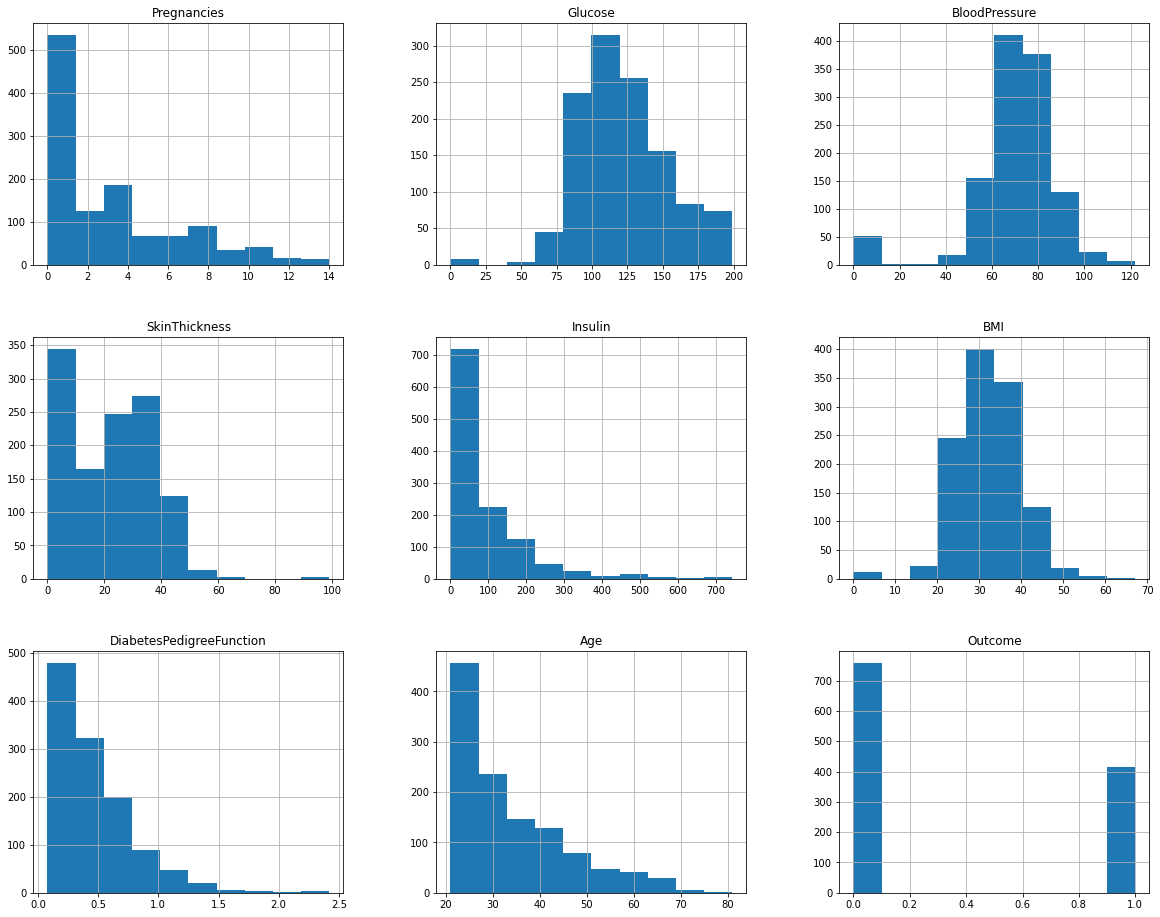

In [8]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
            'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df.hist(figsize=(20, 16))

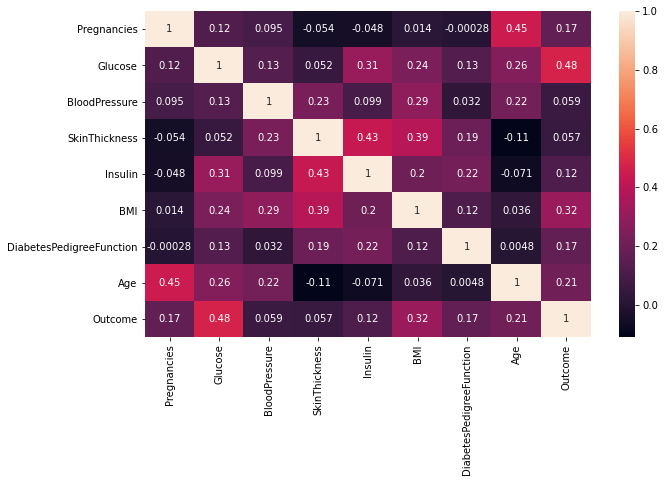

In [9]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.000
Glucose                      42.000
BloodPressure                16.000
SkinThickness                33.000
Insulin                     126.000
BMI                           9.300
DiabetesPedigreeFunction      0.385
Age                          17.000
Outcome                       1.000
dtype: float64


In [11]:
df_cleaned = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df_cleaned.shape

(974, 9)

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

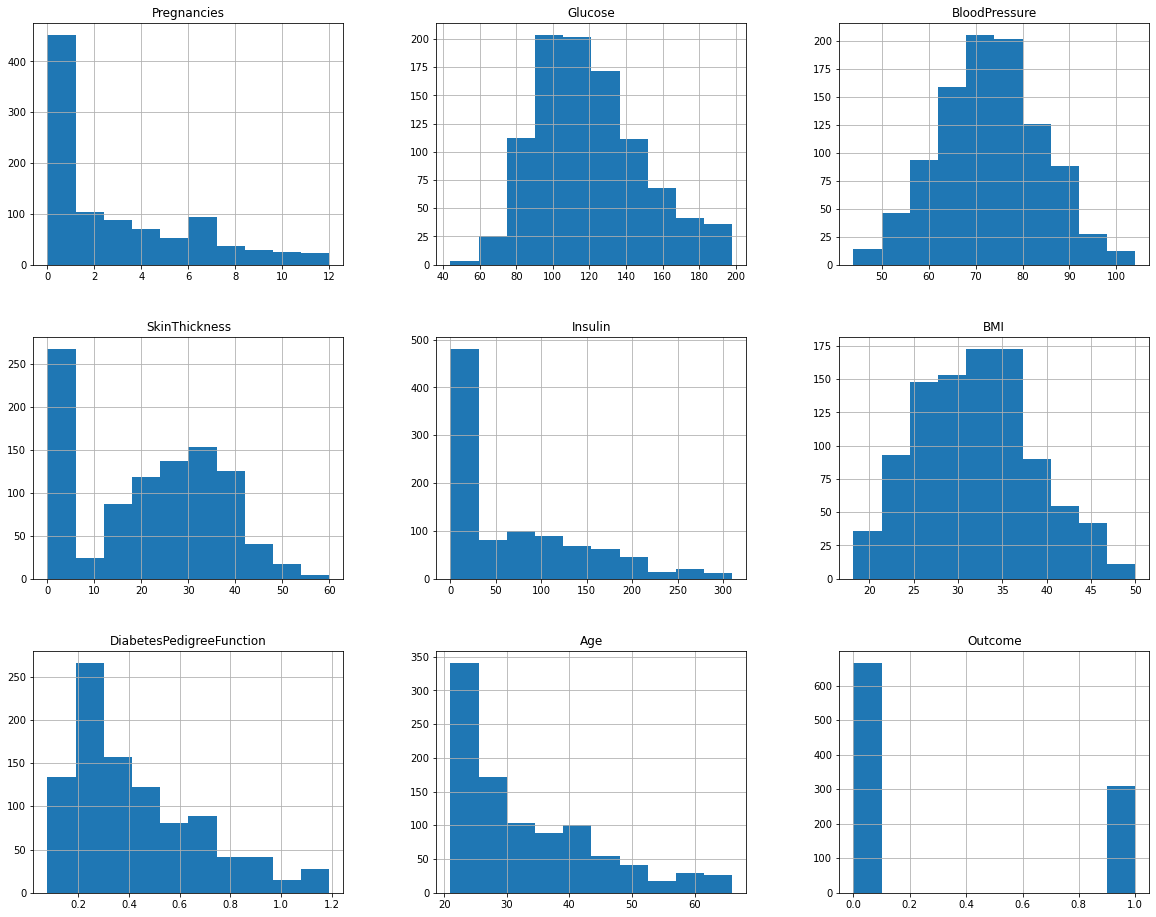

In [12]:
df_cleaned.hist(figsize=(20, 16))

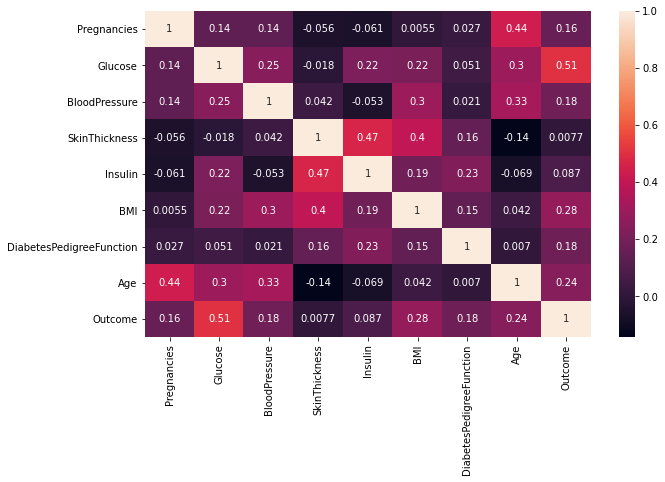

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df_cleaned.corr(), annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned.Outcome
print(X)

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0               2      140             94              0        0  32.7   
1               4      153             88             37      140  40.6   
2               3      100             84             33      105  30.0   
3               1      147             94             41        0  49.3   
4               1       81             74             41       57  46.3   
...           ...      ...            ...            ...      ...   ...   
1165            4       85             58             22       49  27.8   
1166            0       84             82             31      125  38.2   
1168            0      135             68             42      250  42.3   
1170            0      173             78             32      265  46.5   
1171            4       99             72             17        0  25.6   

      DiabetesPedigreeFunction  Age  
0                        0.734   45  
1                      

In [16]:
print(y)

0       1
1       0
2       0
3       1
4       0
       ..
1165    0
1166    0
1168    1
1170    0
1171    0
Name: Outcome, Length: 974, dtype: int64


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training Data: ', X_train.shape)
print('Testing Data: ', X_test.shape)
print('Training Answer: ', y_train.shape)
print('Testing Answer: ', y_test.shape)

Training Data:  (779, 8)
Testing Data:  (195, 8)
Training Answer:  (779,)
Testing Answer:  (195,)


In [18]:
clf = RandomForestClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=42)

In [19]:
preds = clf.predict(X_test)

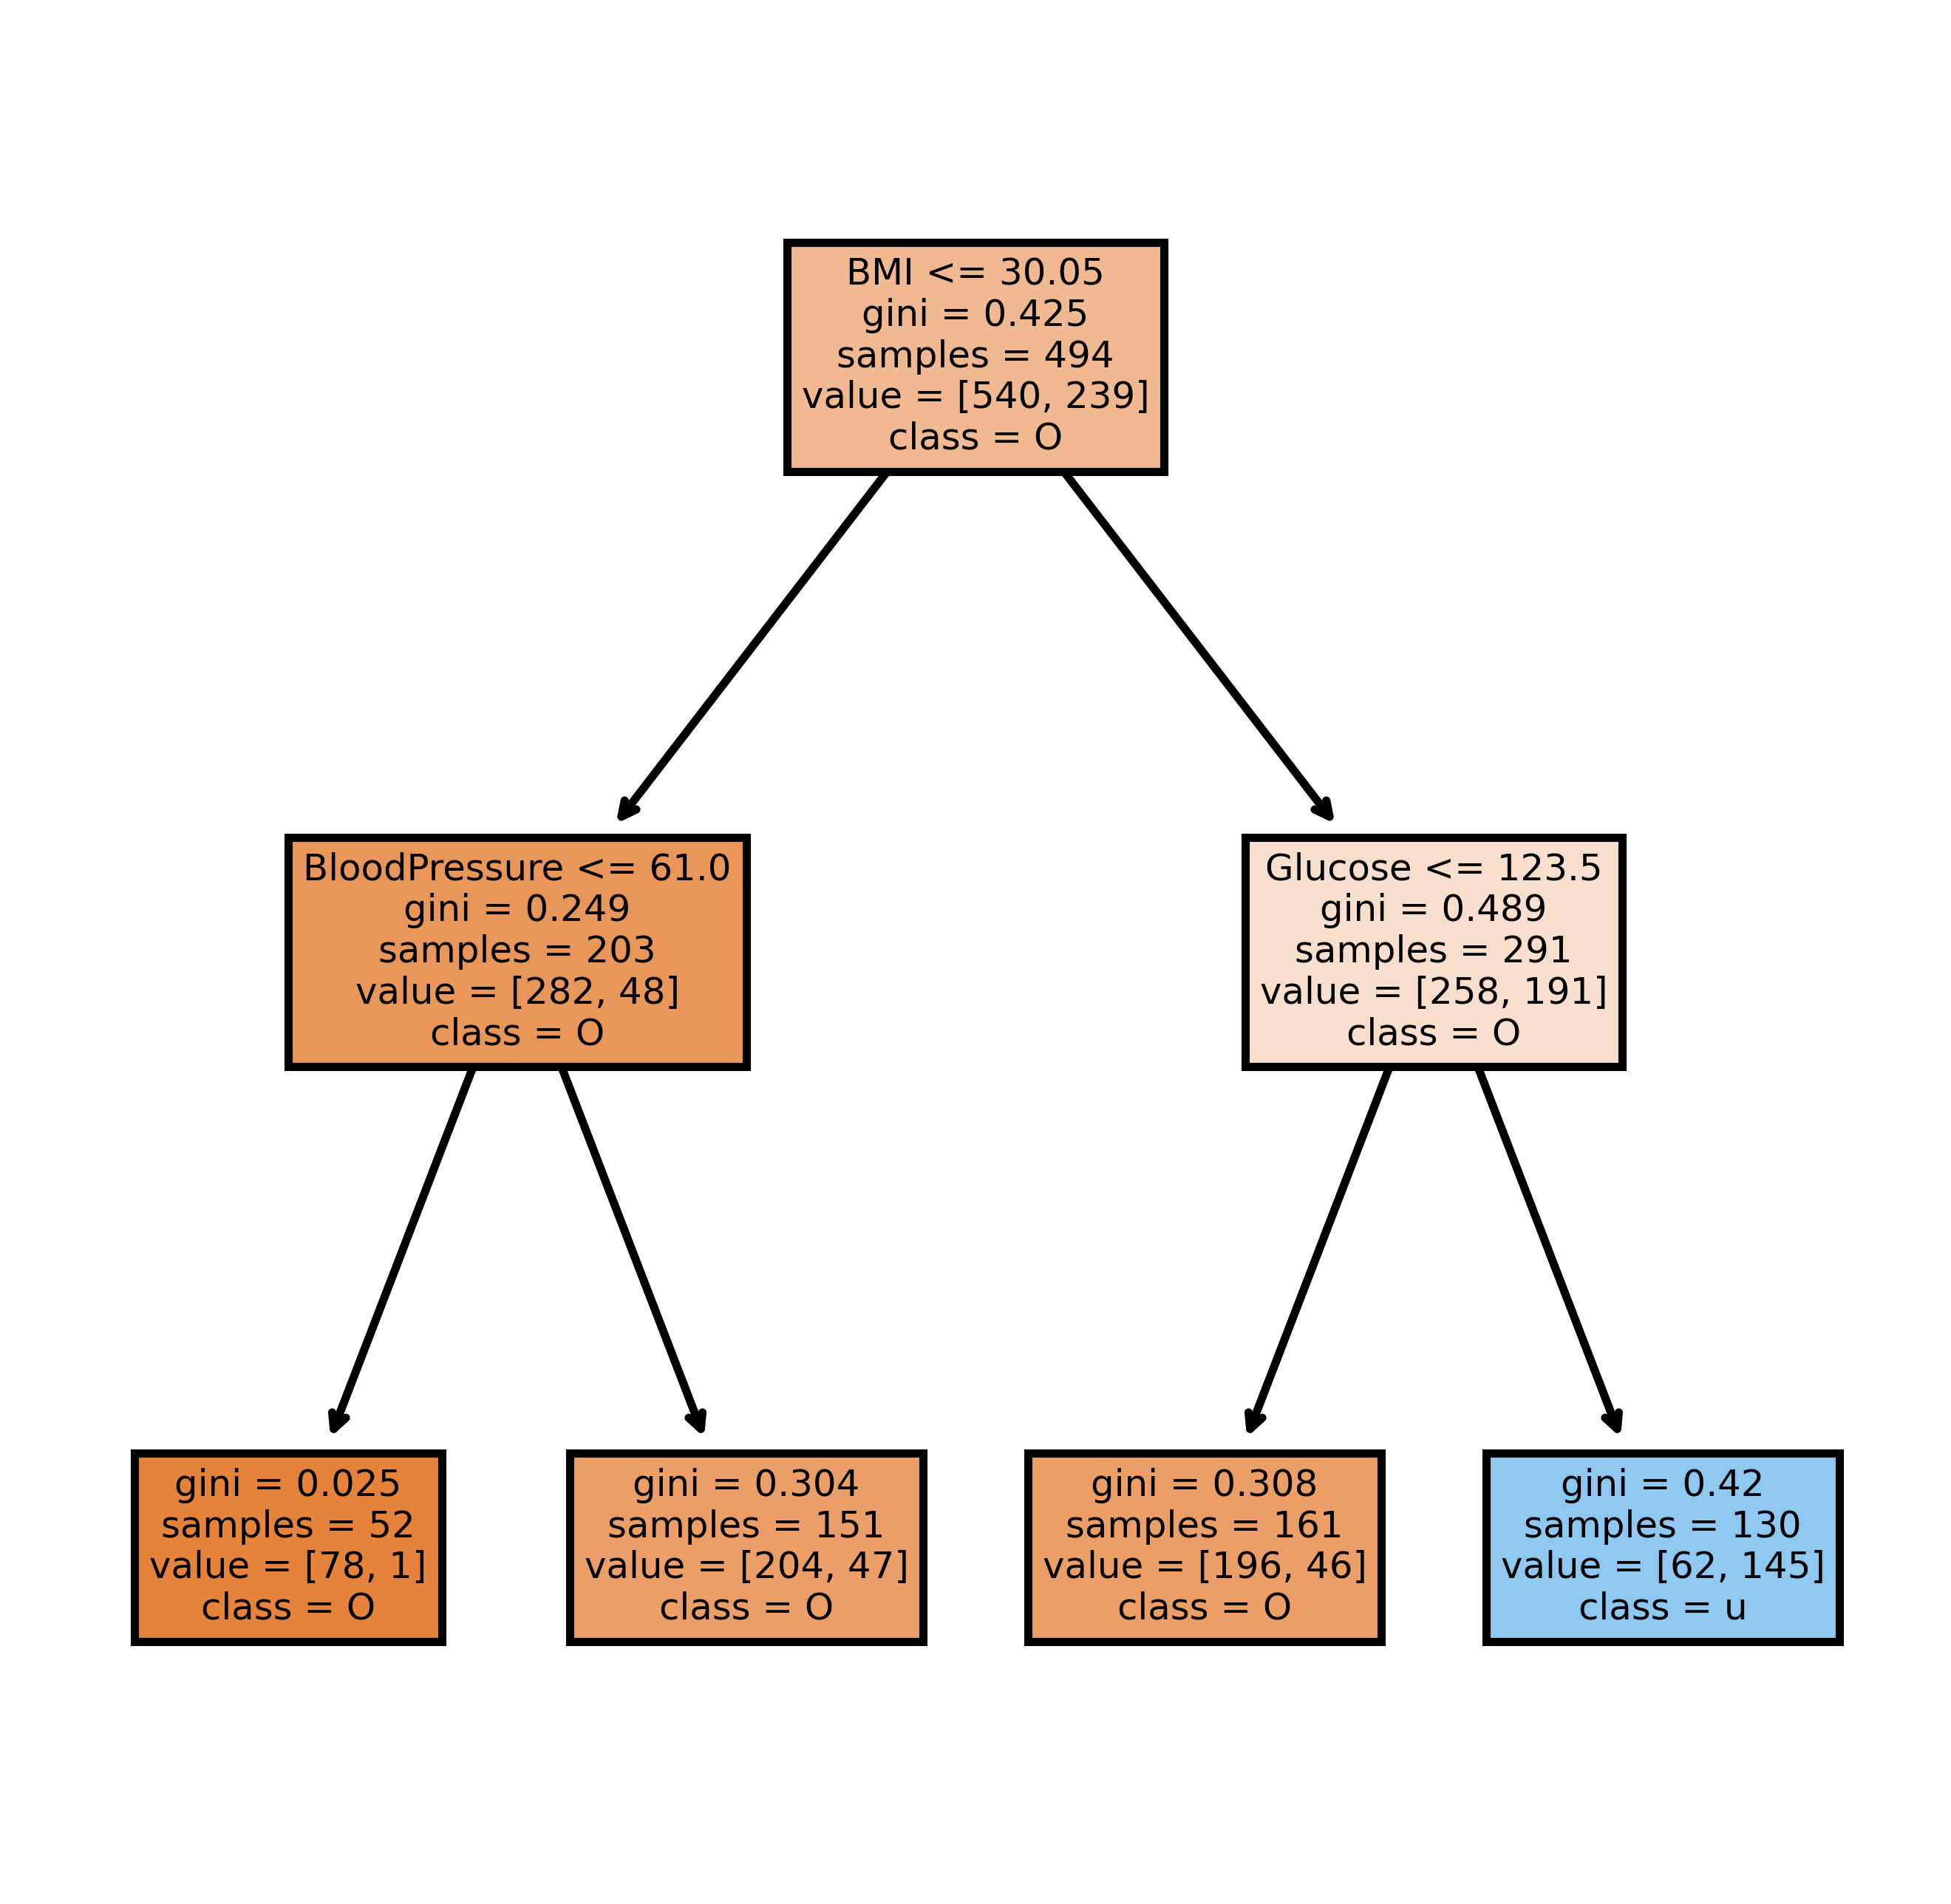

In [20]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf.estimators_[0],
               feature_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], 
               class_names='Outcome',
               filled = True);
fig.savefig('rf_individualtree.png')

In [21]:
from sklearn.metrics import classification_report
target_names = ['0', '1']
print(classification_report(y_test, preds, target_names=target_names))

              precision    recall  f1-score   support

           0       0.71      0.97      0.82       123
           1       0.85      0.32      0.46        72

    accuracy                           0.73       195
   macro avg       0.78      0.64      0.64       195
weighted avg       0.76      0.73      0.69       195

